In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [4]:
X = data.drop("Outcome", axis=1).to_numpy()
Y = data[["Outcome"]].to_numpy()

In [5]:
#Preprocessing
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [6]:


#train-test
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, Y, test_size=0.2, random_state=999, stratify=Y
)

In [7]:
#Logistic
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

D:\data scienece and machine learning\dsml\class07\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
y_pred = log_reg.predict(X_test)

In [9]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [10]:

np.sum(y_test.flatten() == y_pred) /len (y_test.flatten())

np.float64(0.7987012987012987)

## Evaluation Metrics

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[85, 15],
       [16, 38]])

Text(50.722222222222214, 0.5, 'True Labels')

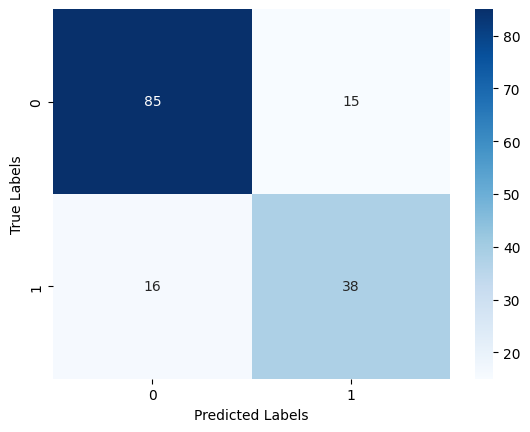

In [13]:
sns.heatmap(matrix, annot= True, cmap="Blues")
plt.xlabel("Predicted Labels")           
plt.ylabel("True Labels")           

## Accuracy

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7987012987012987

## Precision and Recall

In [15]:
from sklearn.metrics import precision_score,recall_score

print("Precision :",precision_score(y_test, y_pred))
print("Recall :",recall_score(y_test, y_pred))

Precision : 0.7169811320754716
Recall : 0.7037037037037037


## F1 Score

In [16]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7102803738317757

In [17]:
# summary report
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.72      0.70      0.71        54

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



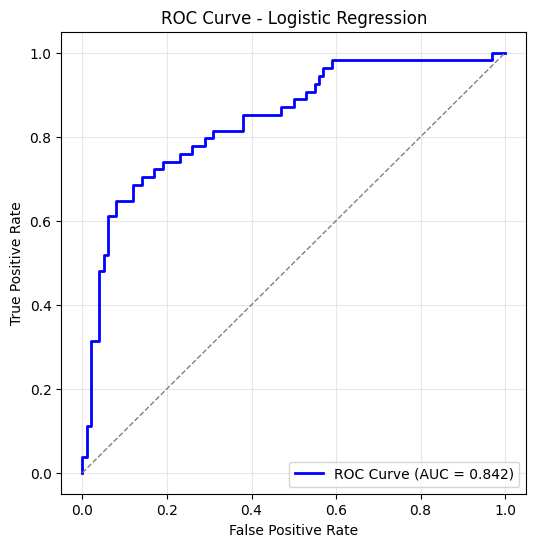

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with AUC shown
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', linewidth=2, 
         label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [25]:
pd.DataFrame(np.array([fpr,tpr,thresholds])).T.head()

,0,1,2
0,0.00,0.000000,inf
1,0.00,0.018519,0.964634
2,0.00,0.037037,0.961612
3,0.01,0.037037,0.946977
4,0.01,0.111111,0.872885
